In [17]:
import numpy as np

#Load various data and functions
import fundamental_gates #Useful single qutrit gates
import interaction_and_decay #parameters - change dephasing rates in here
import embed_functions #functions to embed 1/2-qutrit objects into many-qutrit operators
import gate_sequences #gate sequences for various gates we've discussed - ZZ4 gate sequence is the one actually used in expt
import evolution #functions to calculate evolution of initial state under gate sequence
import teleport

import state_prep
import sim_tools

import testing_utils as test

import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload

## $T_1$ testing

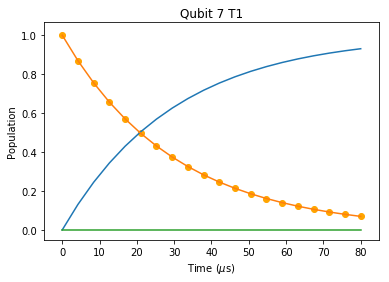

In [2]:
qubit_num = 7

min_delay = 0 #us
max_delay = 80 #us

n_pts = 20

rho_init = sim_tools.vectorize_dm(np.diag([0,1.,0]))

populations = np.zeros((3,n_pts))

times = np.linspace(min_delay, max_delay, n_pts)

for idx, time in enumerate(times):
    delay_gate = [time]
    rho_after = evolution.actFullGateOnState(delay_gate, rho_init, [qubit_num], num_trot=10)
    rho_after = sim_tools.vectorized_dm_to_dm(rho_after)
    populations[:,idx] = np.diag(rho_after)
    
plt.plot(times, populations.T);
plt.scatter(times, test.ideal_T1(qubit_num, times), c = 'orange')
plt.title('Qubit {} T1'.format(qubit_num))
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Population');

Decay operators
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
Decay operators
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
Decay operators
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
Decay operators
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
Decay operators
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
Decay operators
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
Decay operators
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
Decay operators
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  

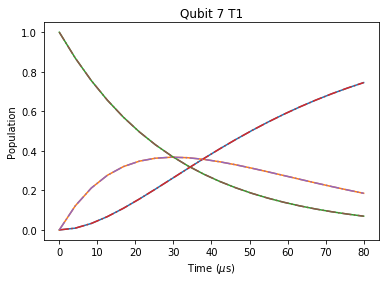

In [23]:
qubit_num = 7

min_delay = 0 #us
max_delay = 80 #us

n_pts = 20

rho_init = sim_tools.vectorize_dm(np.diag([0,0,1]))

populations = np.zeros((3,n_pts))

times = np.linspace(min_delay, max_delay, n_pts)

for idx, time in enumerate(times):
    delay_gate = [time]
    rho_after = evolution.actFullGateOnState(delay_gate, rho_init, [qubit_num], num_trot=10)
    rho_after = sim_tools.vectorized_dm_to_dm(rho_after)
    populations[:,idx] = np.diag(rho_after)
    
plt.plot(times, populations.T);
plt.plot(times, test.ideal_T1EF(qubit_num, times), ls='-.')
plt.title('Qubit {} T1'.format(qubit_num))
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Population');

In [22]:
reload(evolution)

<module 'evolution' from '/Users/qnl/Documents/Vinay/QNL/Code/qutrit_teleportation_simulation_042219/evolution.py'>